# In this file, I will attemp to perform custering in a small datashet about the usage behavior of about 9000 active credit card holders.

In [216]:
# First, I will import the needed libraries
import numpy as np 
import pandas as pd 

# visualization libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [217]:
# Let's read the csv file
df = pd.read_csv("........../clustering_data.csv")

In [218]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [219]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [220]:
df.info()
# Τhere are no categorical variables in this dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# The meanings of this dataset's variables are:
1) CUSTID: Identification of Credit Card holder
2) BALANCE: Balance amount left in their account to make purchases 
3) BALANCEFREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4) PURCHASES: Amount of purchases made from account
5) ONEOFFPURCHASES: Maximum purchase amount done in one-go
6) INSTALLMENTSPURCHASES: Amount of purchase done in installment
7) CASHADVANCE: Cash in advance given by the user
8) PURCHASESFREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9) ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
9) PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
10) CASHADVANCEFREQUENCY: How frequently the cash in advance being paid
11) CASHADVANCETRX: Number of Transactions made with "Cash in Advanced"
12) PURCHASESTRX: Numbeρ of purchase transactions made
13) CREDITLIMIT: Limit of Credit Card for user
14) PAYMENTS: Amount of Payment done by user
15) MINIMUM_PAYMENTS: Minimum amount of payments made by user
16) PRCFULLPAYMENT: Percent of full payment paid by user
17) TENURE: Tenure of credit card service for user

In [ ]:
###########################################################################################################################

# Data Preparation

In [221]:
# Since the variable 'CUSTID' is not usefull (We don't know who is who), I will drop it
df.drop('CUST_ID',axis = 1,inplace= True)

In [222]:
df.head()
# CUSTID has left the building

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [223]:
df.isnull().sum()
# We have 313 missing values in the column 'MINIMUM_PAYMENTS' and 1 missing value in the column 'CREDIT_LIMIT'

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [224]:
# To deal with the missing values, I will first drop the row with the 'CREDIT_LIMIT' missing value
df.dropna(subset=['CREDIT_LIMIT'],inplace=True)

In [225]:
df.count()

BALANCE                             8949
BALANCE_FREQUENCY                   8949
PURCHASES                           8949
ONEOFF_PURCHASES                    8949
INSTALLMENTS_PURCHASES              8949
CASH_ADVANCE                        8949
PURCHASES_FREQUENCY                 8949
ONEOFF_PURCHASES_FREQUENCY          8949
PURCHASES_INSTALLMENTS_FREQUENCY    8949
CASH_ADVANCE_FREQUENCY              8949
CASH_ADVANCE_TRX                    8949
PURCHASES_TRX                       8949
CREDIT_LIMIT                        8949
PAYMENTS                            8949
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                    8949
TENURE                              8949
dtype: int64

In [226]:
# Then, I will fill the missing values of 'MINIMUM PAYMENTS with the median of the whole column
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

In [227]:
df.isnull().sum()
# There aren't any missing values

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# Descriptive Statistics

In [137]:
df.describe()
# Many outliers in every column. 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,845.003358,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2332.905284,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,170.875613,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,312.452292,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,788.721609,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Observations:
1) 8949 observations, 17 variables
2) Mean balance is 1564
3) Balance frequency is frequently updated on average ~0.9
4) Purchases average is 1000
5) One off purchase average is 600
6) Average purchases frequency is around 0.5
7) Average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
8) Average credit limit ~ 4500
9) Percent of full payment is 15%
10) Average tenure is 11 years

# Data Visualization

<Figure size 2160x360 with 0 Axes>

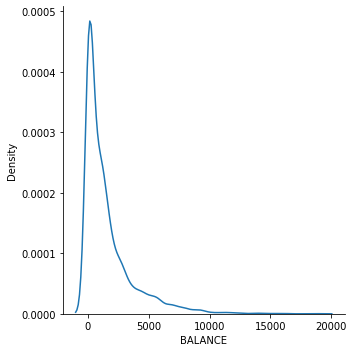

<Figure size 2160x360 with 0 Axes>

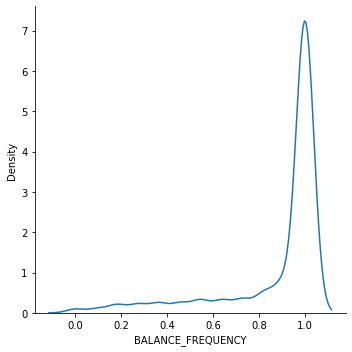

<Figure size 2160x360 with 0 Axes>

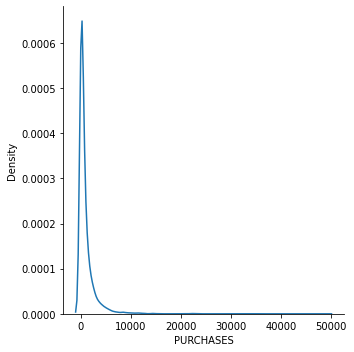

<Figure size 2160x360 with 0 Axes>

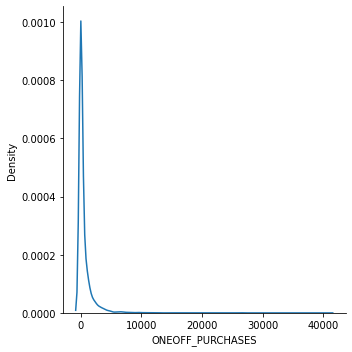

<Figure size 2160x360 with 0 Axes>

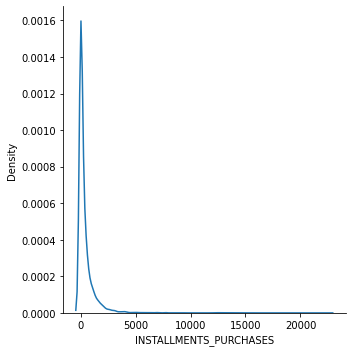

<Figure size 2160x360 with 0 Axes>

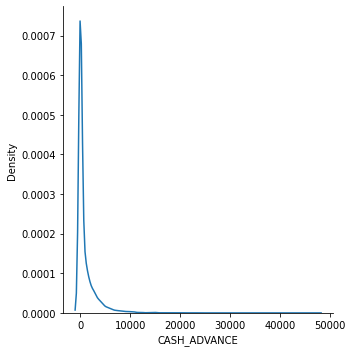

<Figure size 2160x360 with 0 Axes>

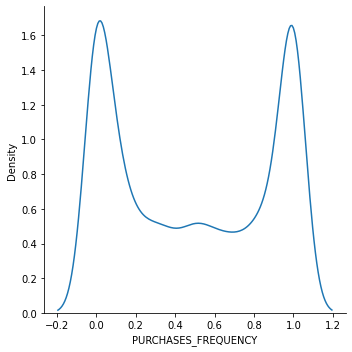

<Figure size 2160x360 with 0 Axes>

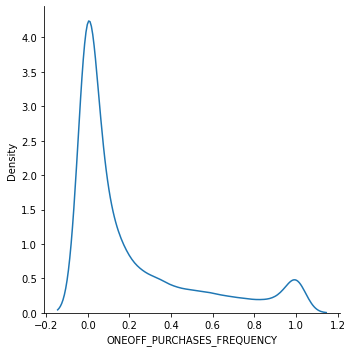

<Figure size 2160x360 with 0 Axes>

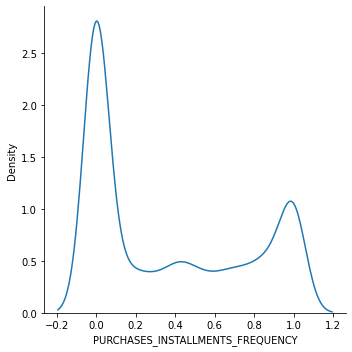

<Figure size 2160x360 with 0 Axes>

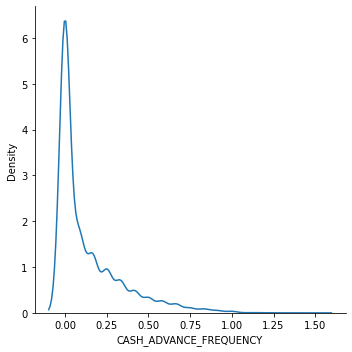

<Figure size 2160x360 with 0 Axes>

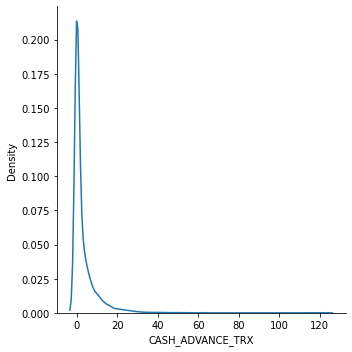

<Figure size 2160x360 with 0 Axes>

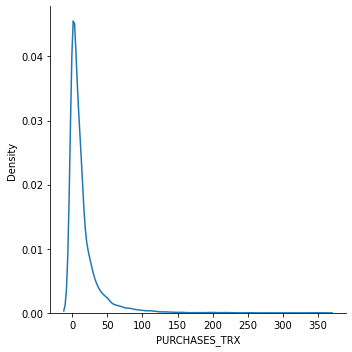

<Figure size 2160x360 with 0 Axes>

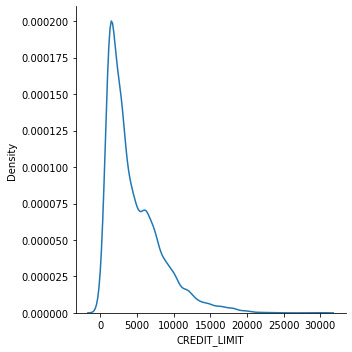

<Figure size 2160x360 with 0 Axes>

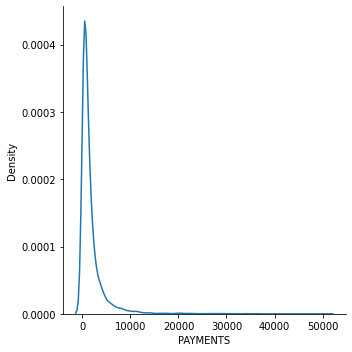

<Figure size 2160x360 with 0 Axes>

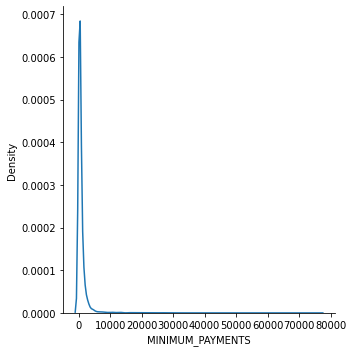

<Figure size 2160x360 with 0 Axes>

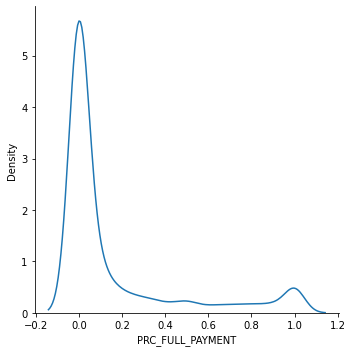

<Figure size 2160x360 with 0 Axes>

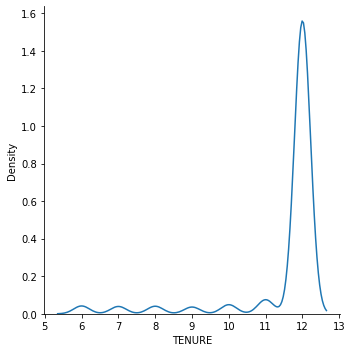

In [99]:
for column in df.columns:
    plt.figure(figsize = (30,5))
    sns.displot(df[column],kind="kde")
    plt.show()

# Ι did the following realizations:

1) Most credit card holders have low credit limit and maintain credit balance below 7500.
2) Variables such as Purchases, OneOffPurchases, installmentpurchases and cash advances also follow the same trend as credit balance. 
3) The number of card-holders who pay in installments, are more than the card-holders who payed the full amount.
4) In the last 6 months, most card-holders made total payments below 10.000. The minimum payment was below 5000.
5) Most card-holders own a card for more than 12 months.


In [50]:
############################################################################################################################

# Bivariate Analysis

<Figure size 864x720 with 0 Axes>

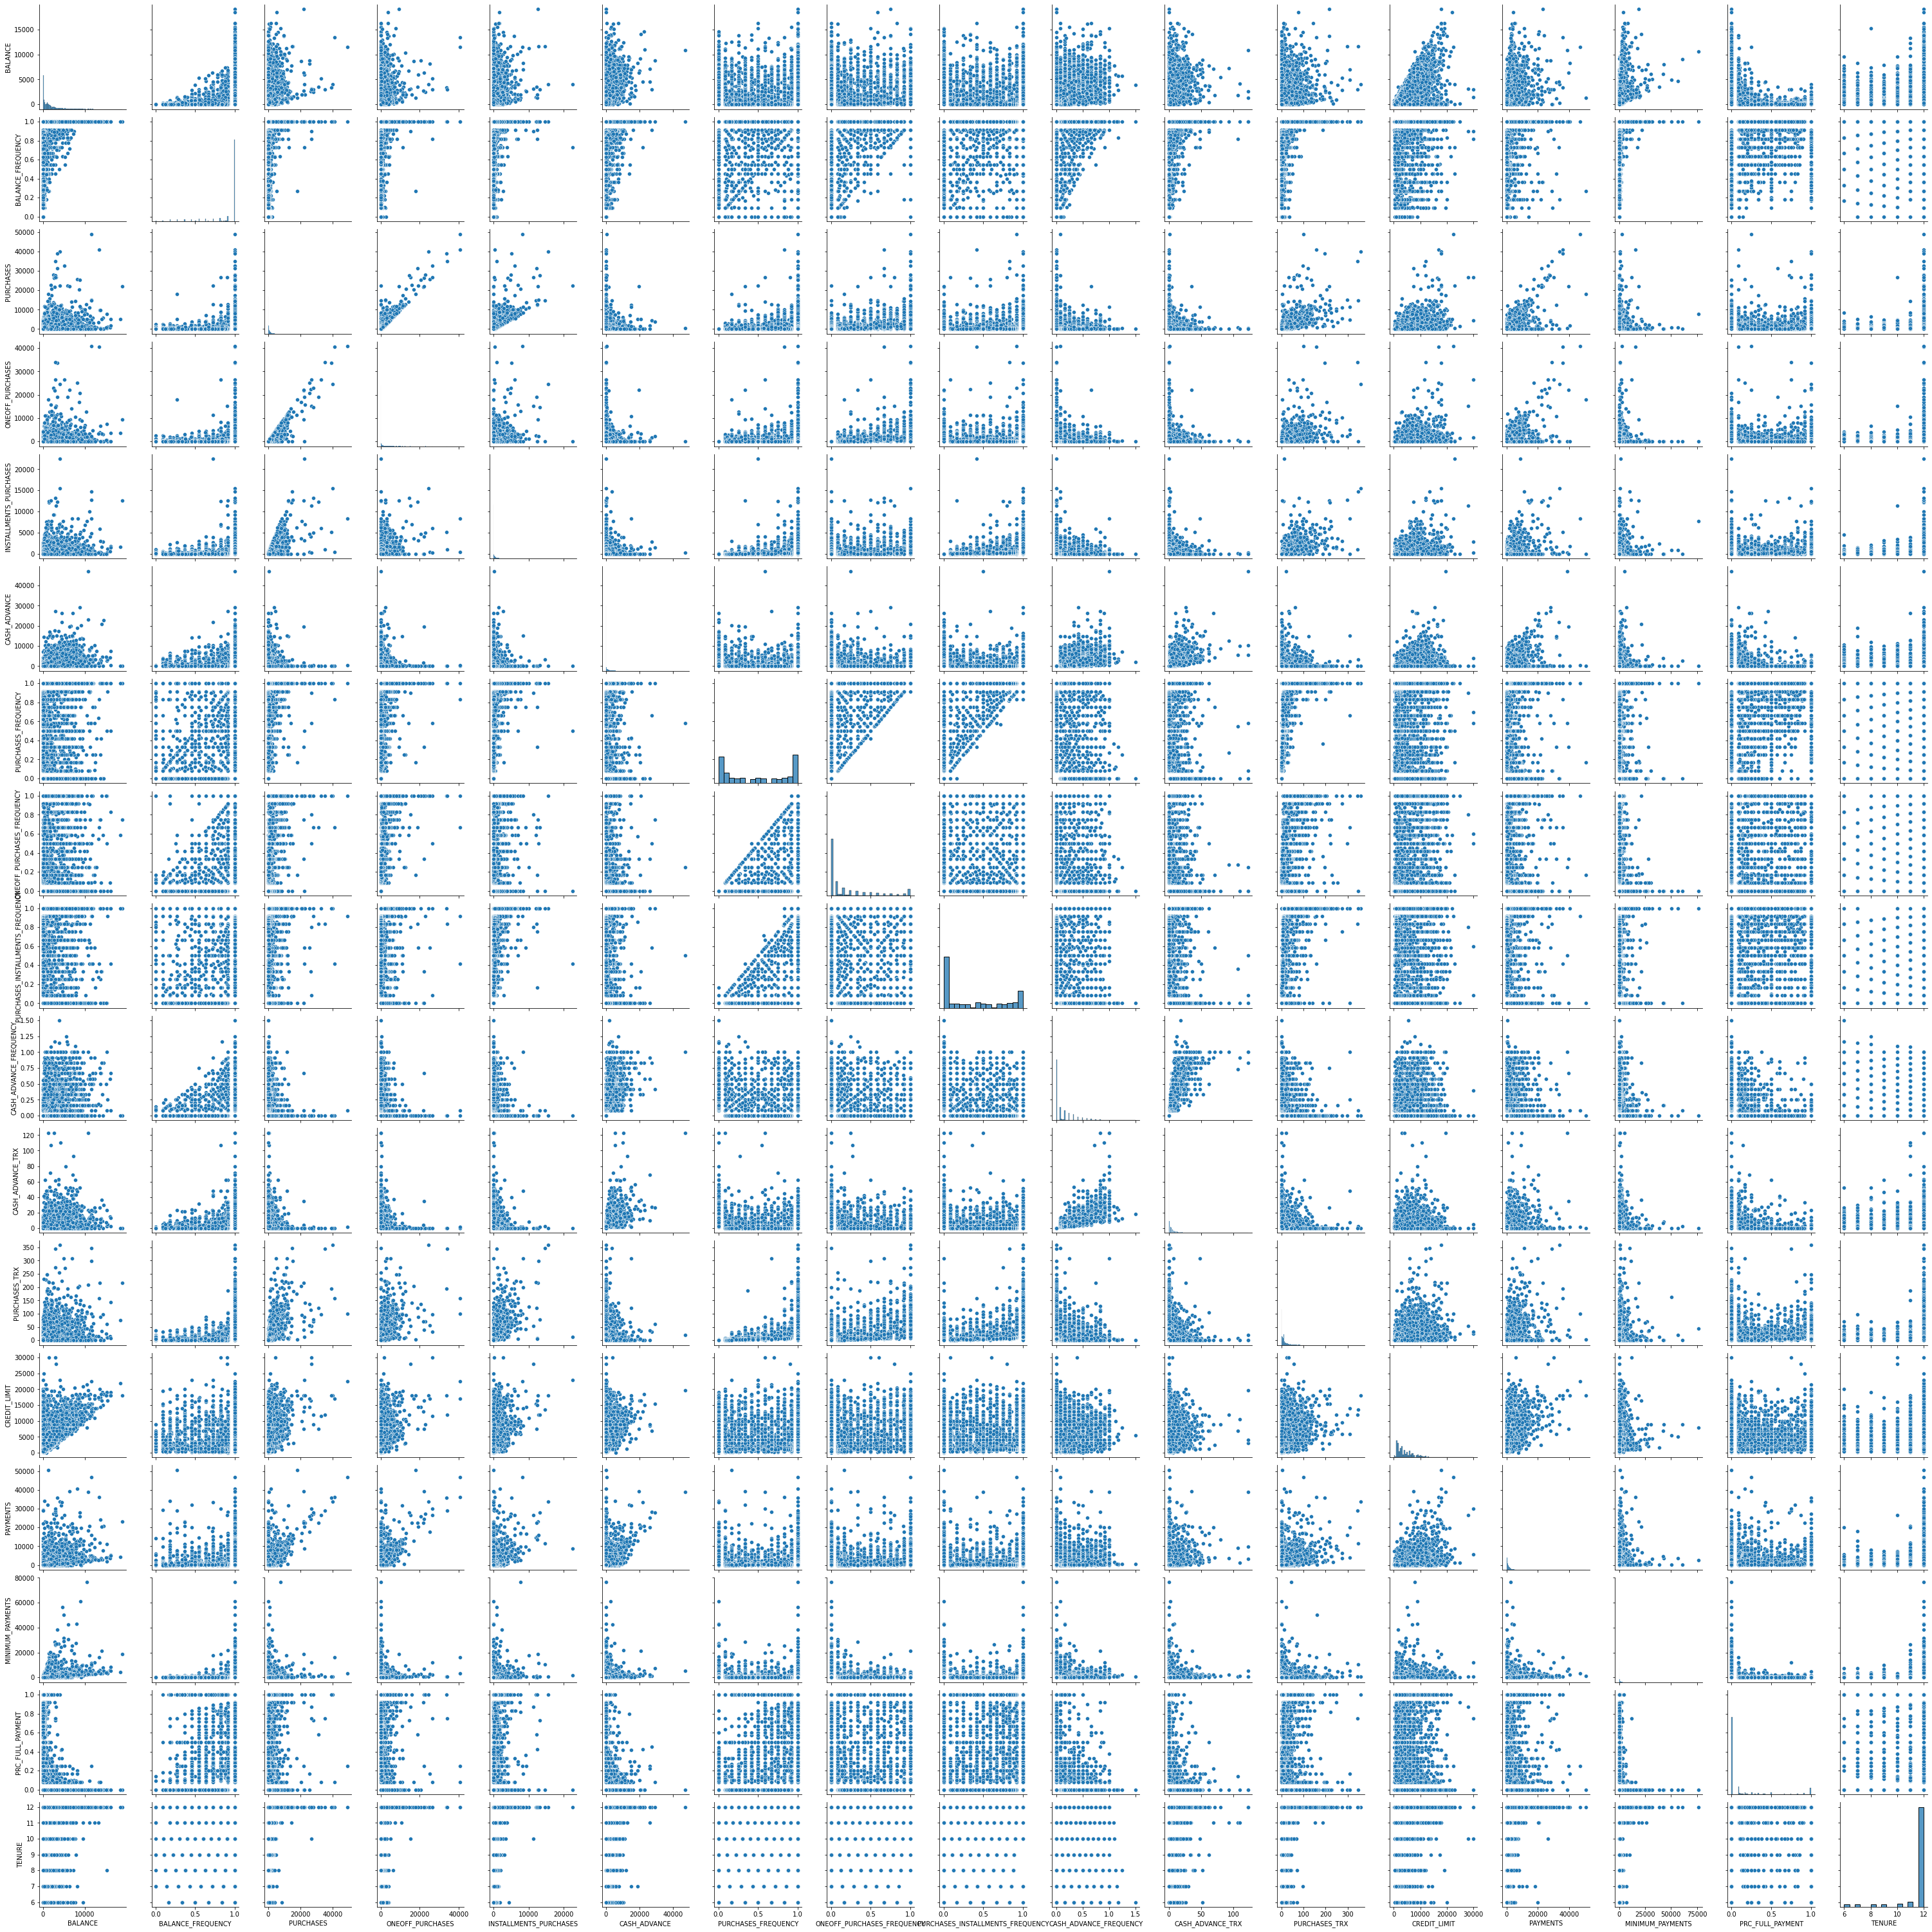

In [333]:
plt.figure(figsize=(12,10))
sns.pairplot(df)
plt.show()

# Ι noticed the following:

1) As the credit limit increases, the balance also increases (linear relationship).
2) As the number of purchases increase, the number of "cash in advance" transactions decrease.
3) When the credit balance is low, the purchases, oneoffpurchases and installments purchases are also low.
4) Purchases, oneoffpurchases and installment purchases show linear relationship.

In [ ]:
###############################################################################################################

# Correlation Heatmap 

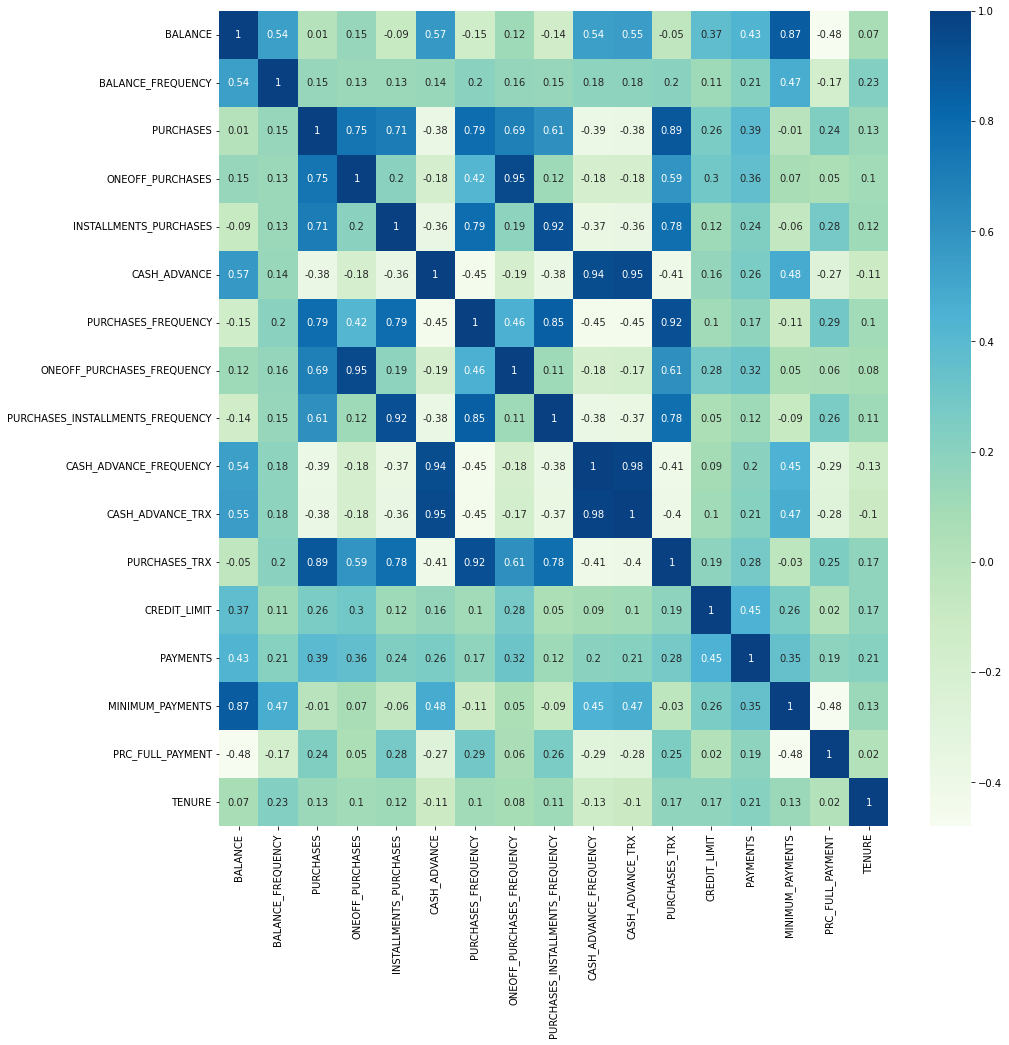

In [122]:
plt.figure(figsize=(15, 15))
sns.heatmap(round(df.corr(method='spearman'), 2), 
            annot=True, mask=None, cmap='GnBu')
plt.show()

 Α mess of a heatmap. There are many strong correlations between columns. The strongest can be seen in the center of the map.

In [138]:
corr_mat = df.corr()
corr_mat = corr_mat.unstack()
corr_mat = corr_mat.sort_values(kind="quicksort").drop_duplicates()
corr_mat[corr_mat>0.5]

PURCHASES_FREQUENCY               ONEOFF_PURCHASES_FREQUENCY    0.501305
PURCHASES_INSTALLMENTS_FREQUENCY  INSTALLMENTS_PURCHASES        0.511334
ONEOFF_PURCHASES_FREQUENCY        ONEOFF_PURCHASES              0.524881
PURCHASES_INSTALLMENTS_FREQUENCY  PURCHASES_TRX                 0.529949
CREDIT_LIMIT                      BALANCE                       0.531283
PURCHASES_TRX                     ONEOFF_PURCHASES_FREQUENCY    0.544849
                                  ONEOFF_PURCHASES              0.545514
PAYMENTS                          ONEOFF_PURCHASES              0.567283
PURCHASES_FREQUENCY               PURCHASES_TRX                 0.568408
PAYMENTS                          PURCHASES                     0.603252
PURCHASES_TRX                     INSTALLMENTS_PURCHASES        0.628097
CASH_ADVANCE                      CASH_ADVANCE_FREQUENCY        0.628535
                                  CASH_ADVANCE_TRX              0.656493
INSTALLMENTS_PURCHASES            PURCHASES        

Here are all the variables that have more than 50% correlation between them. 
High Correlation Coefficient Pairs Analysis:

PURCHASES & ONEOFFPURCHASES: 0.92
When people use one-off purchases, purchase amount is higher than using installment purchases.

PURCHASESFREQUENCY & PURCHASESINSTALLMENTSFREQUENCY: 0.86
More people use installment purchases.

CASHADVANCEFREQUENCY & CASHADVANCETRX: 0.80

Text(0.5, 1.0, 'Kernel Density Estimation Plot')

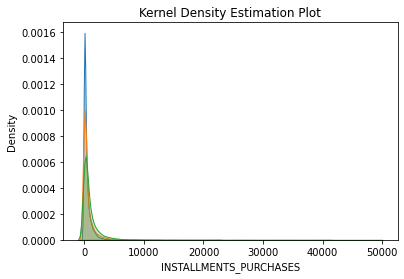

In [284]:
sns.kdeplot(df['INSTALLMENTS_PURCHASES'], shade=True)
sns.kdeplot(df['ONEOFF_PURCHASES'], shade=True)
sns.kdeplot(df['PURCHASES'], shade=True)
plt.title('Kernel Density Estimation Plot')

Text(0.5, 1.0, 'Kernel Density Estimation Plot')

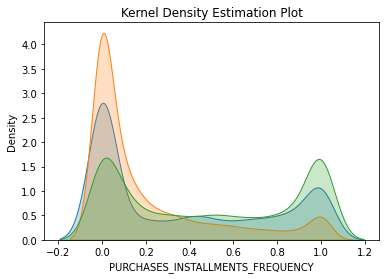

In [286]:
sns.kdeplot(df['PURCHASES_INSTALLMENTS_FREQUENCY'], shade=True)
sns.kdeplot(df['ONEOFF_PURCHASES_FREQUENCY'], shade=True)
sns.kdeplot(df['PURCHASES_FREQUENCY'], shade=True)
plt.title('Kernel Density Estimation Plot')

# Scatter Plots

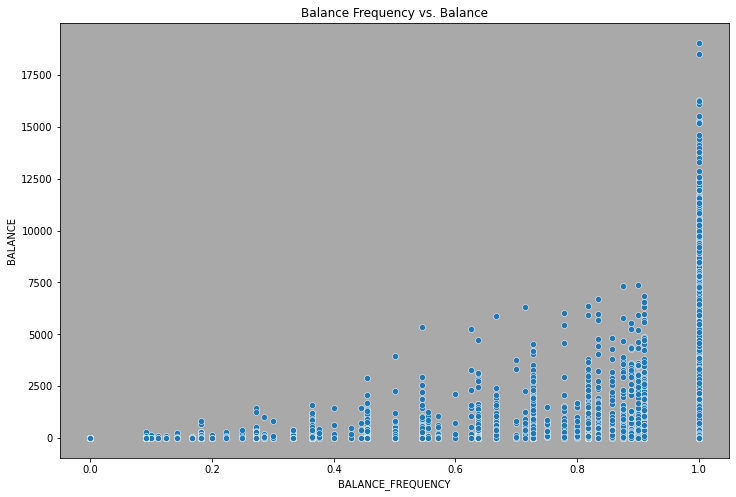

In [330]:
plt.figure(figsize=(12,8))
ax = plt.axes() 
ax.set_facecolor('darkgrey') 
g = sns.scatterplot(x='BALANCE_FREQUENCY', y='BALANCE', data=df)
g.set_title('Balance Frequency vs. Balance')
plt.show()

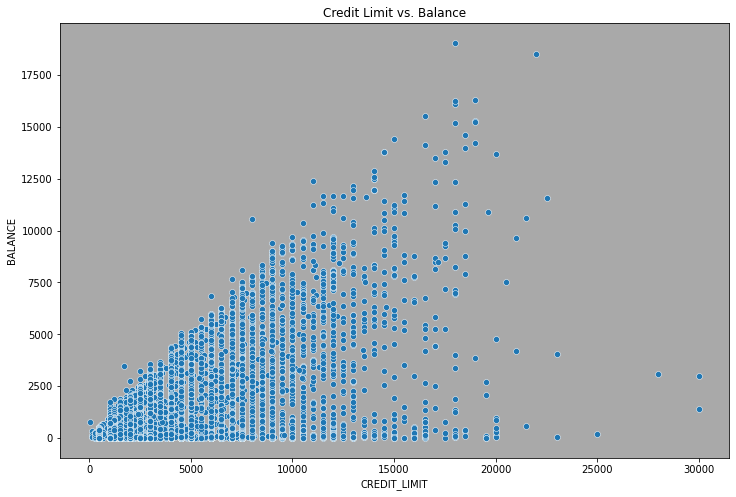

In [405]:
plt.figure(figsize=(12,8))
ax = plt.axes() 
ax.set_facecolor('darkgrey') 
g = sns.scatterplot(x='CREDIT_LIMIT', y='BALANCE', data=df)
g.set_title('Credit Limit vs. Balance')
plt.show()

I can see some correlation between credit limit and balance, so those with a higher credit limit are generally spending more.

In [ ]:
###############################################################################################################

# Clustering Model
I will use the variables "Balance" and "Credit_Limit" to create clusters. These clusters will represent types of card-holders.

In [477]:
X = df[['BALANCE', 'CREDIT_LIMIT']]

In [478]:
X

,BALANCE,CREDIT_LIMIT
0,40.900749,1000.0
1,3202.467416,7000.0
2,2495.148862,7500.0
3,1666.670542,7500.0
4,817.714335,1200.0
...,...,...
8945,28.493517,1000.0
8946,19.183215,1000.0
8947,23.398673,1000.0
8948,13.457564,500.0


# Silhouette Score

Before we perform clustering, we need to find which is the best number of clusters, for this dataset.

In [479]:
#create empty list to store score
silhouette_scores_list = []

# loop from 2 to 10 clusters:
for clusters_number in range(2, 11):
    # initiate and customize algo
    kmeans_algo = KMeans(n_clusters=clusters_number, random_state=0)
    # fit algo to the data
    clusters = kmeans_algo.fit_predict(X)
    # calculate silhouette score for each number of clusters
    silhouette_metric_score = silhouette_score(X, clusters)
    # append each score to the list
    silhouette_scores_list.append(silhouette_metric_score)
    print(
        f"For clusters={clusters_number}, the average silhouette_score is: {silhouette_metric_score}")

For clusters=2, the average silhouette_score is: 0.5818444190382005
For clusters=3, the average silhouette_score is: 0.5263973548377533
For clusters=4, the average silhouette_score is: 0.5198876609323482
For clusters=5, the average silhouette_score is: 0.4959213322179171
For clusters=6, the average silhouette_score is: 0.4319412332808492
For clusters=7, the average silhouette_score is: 0.4411079468084628
For clusters=8, the average silhouette_score is: 0.4163439957898543
For clusters=9, the average silhouette_score is: 0.44349116124038884
For clusters=10, the average silhouette_score is: 0.4315430582828205


Since the best silhouette score, is the one with 2 clusters, I will create to clusters and see the results

# Perform K-means with 2 Clusters

In [480]:
# call the Kmenas algo to initialize it, and customise it with 2 clusters
# set random_state to always generate the same results
kmeans = KMeans(n_clusters=2, random_state=0)

In [481]:
kmeans

KMeans(n_clusters=2, random_state=0)

In [482]:
# fit the 2 clusters customized algorithm to the data.
fit_kmeans = kmeans.fit(X)

In [483]:
# create predictions = assign each observation of X to a cluster
predictions = fit_kmeans.predict(X)

In [484]:
predictions

array([1, 0, 0, ..., 1, 1, 1], dtype=int32)

In [485]:
# create a new column, d it to the dataframe to show clustersof observations.
df["cluster"] = pd.DataFrame(
    predictions, columns=["cluster"])

# set cluster column values as category data type
df["cluster"] = df["cluster"].astype('category')

#show first 6 rows of observations
df.head(6)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1.0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0.0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.452292,0.000000,12,0.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1.0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,1.0


In [486]:
# count number of observations in each cluster, sorted by number of observations
df['cluster'].value_counts()

1.0    6583
0.0    2365
Name: cluster, dtype: int64

In [487]:
# same as above, different syntax, output sorted by cluster number
df.groupby('cluster').size()

cluster
0.0    2365
1.0    6583
dtype: int64

In [488]:
df.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0.0,2968.397961,0.921386,1731.801400,1107.870419,624.34104,1734.645925,0.538368,0.301629,0.386556,0.176836,4.609302,22.265962,8473.965020,3003.191238,1288.319594,0.152745,11.725159
1.0,1060.519128,0.861562,741.588896,407.277484,334.57221,707.602150,0.473148,0.166790,0.356602,0.120131,2.760595,11.996202,3065.274322,1277.383866,685.853095,0.154110,11.444326


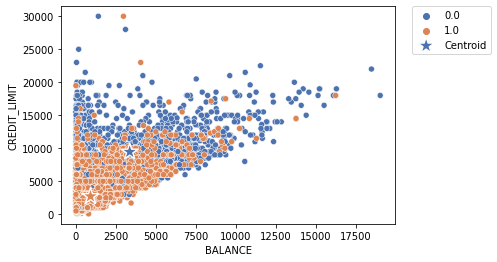

In [489]:
# plot the clusters with their centroids
sns.scatterplot(x="BALANCE", y="CREDIT_LIMIT", hue="cluster", data=df, palette="deep");
sns.scatterplot(x=fit_kmeans.cluster_centers_[:, 0],
                y=fit_kmeans.cluster_centers_[:, 1],
                s=300, c=sns.color_palette("deep", 2),
                label='Centroid', marker='*');

# Put the legend outside of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

In this scenario, the company could create deals for card-holders with lower balance and credit limit, and for card-holders with higher balance and credit limit. 

There are some outliers that completely disprove this clustering method. It seems that 2 clusters will not be able to make accurate predictions about card-holder profiles. I will need to create more clusters and maybe try other variables, to distinguish card-holders. 

# Perform K-means with 5 Clusters

In [500]:
# call the Kmenas algo to initialize it, and customise it with 5 clusters
# set random_state to always generate the same results
kmeans1 = KMeans(n_clusters=5, random_state=0)

In [491]:
kmeans1

KMeans(n_clusters=5, random_state=0)

In [492]:
# fit the 5 clusters customized algorithm to the data.
fit_kmeans1 = kmeans1.fit(X)

In [493]:
# create predictions = assign each observation of X to a cluster
predictions1 = fit_kmeans1.predict(X)

In [494]:
predictions1

array([0, 4, 4, ..., 0, 0, 0], dtype=int32)

In [495]:
# create a new column, d it to the dataframe to show clustersof observations.
df["cluster"] = pd.DataFrame(
    predictions1, columns=["cluster"])

# set cluster column values as category data type
df["cluster"] = df["cluster"].astype('category')

#show first 6 rows of observations
df.head(6)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0.0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4.0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.452292,0.000000,12,2.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0.0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0.0


In [496]:
# count number of observations in each cluster, sorted by number of observations
df['cluster'].value_counts()

0.0    4845
2.0    2079
4.0    1067
1.0     606
3.0     351
Name: cluster, dtype: int64

In [497]:
# same as above, different syntax, output sorted by cluster number
df.groupby('cluster').size()

cluster
0.0    4845
1.0     606
2.0    2079
3.0     351
4.0    1067
dtype: int64

In [498]:
df.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0.0,992.896912,0.860419,646.671988,346.576384,300.412204,671.043383,0.450793,0.143768,0.343787,0.121866,2.768008,10.736636,2572.166516,1154.034548,691.163908,0.143329,11.355624
1.0,1196.736174,0.863380,2169.057541,1454.917723,714.256980,828.126693,0.612293,0.381518,0.416515,0.084622,1.932343,25.325083,10783.085809,3346.869227,565.738080,0.292961,11.760726
2.0,946.184365,0.863110,1148.505464,662.277345,486.316099,692.203426,0.566476,0.264489,0.414713,0.093710,2.283309,17.376142,5014.541300,1720.828066,510.492567,0.210232,11.711881
3.0,7162.026002,0.967674,2809.436496,1825.278462,984.158034,3767.119815,0.531640,0.295652,0.417896,0.289618,8.236467,30.943020,12003.276353,5279.600733,2755.488330,0.047549,11.752137
4.0,3734.641537,0.960397,1083.561659,677.442512,406.961500,2105.138351,0.439100,0.215489,0.313767,0.253833,6.423618,16.193065,6171.087160,2306.770127,1726.176107,0.046876,11.667291


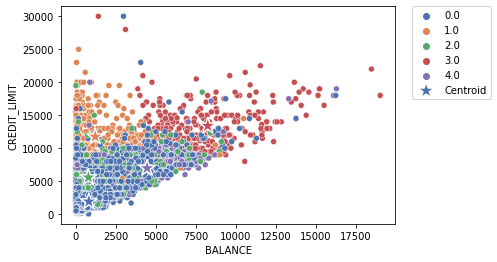

In [499]:
# plot the clusters with their centroids
sns.scatterplot(x="BALANCE", y="CREDIT_LIMIT", hue="cluster", data=df, palette="deep");
sns.scatterplot(x=fit_kmeans1.cluster_centers_[:, 0],
                y=fit_kmeans1.cluster_centers_[:, 1],
                s=300, c=sns.color_palette("deep", 5),
                label='Centroid', marker='*');

# Put the legend outside of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

In this scenario, the company can create deals for the following types of card-holders:
1) Low Credit Limit and Low Balance
2) Medium Credit Limit and Low Balance
3) High Credit Limit and Low Balance
4) Medium Credit Limit and Medium Balance 
5) High Credit Limit and High Balance
Again there are some outliers, but the general distictions are more obvious than before.

# Conclusion
This assignment was very interesting and it shows that any dataset can be clustered, if there is a significant amount of data. It shows how a data scientist can create a story, using visual and numerical aids. The variables I used, tell a story about card-holder types. It can be fitted with other varibles and can tell a completely differrent story. This is the beauty of data science and machine learning!
P.S I could have made some mistakes, so please don't judge me harshly. :^)

# Domo Arigato Mr. Argyrioy :^)